<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Reto3_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**0. Se cargan las Librerias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Conexión con mi unidad en Google Drive

import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar warning (me estresan los warnings >:|)
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**1. Cargamos la Base de datos**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


##**2. Organizamos la Base de Datos**

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
data= df.dropna()
data.shape

(2216, 29)

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
#Se eliminan aquellas columnas que no son de interés para la compañia. Dejando así aquellas que son relevantes para ellos, en este caso: edad, número de hijos, total de gasto de productos, total de promociones, Ingresos, número de visitas en páginas web y nivel educativo.
data= df.drop(labels=['ID', 'Marital_Status','Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                      'NumStorePurchases', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)
data.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,58138.0,0,0,635,88,546,172,88,88,7,0,0,0,0,0,1
1,1954,Graduation,46344.0,1,1,11,1,6,2,1,6,5,0,0,0,0,0,0
2,1965,Graduation,71613.0,0,0,426,49,127,111,21,42,4,0,0,0,0,0,0
3,1984,Graduation,26646.0,1,0,11,4,20,10,3,5,6,0,0,0,0,0,0
4,1981,PhD,58293.0,1,0,173,43,118,46,27,15,5,0,0,0,0,0,0


In [ ]:
#Se organiza la variable Year_Birth para convertirla en Edad
data['Age']=2024- data["Year_Birth"]
data['Age']

,Age
0,67
1,70
2,59
3,40
4,43
...,...
2235,57
2236,78
2237,43
2238,68


In [ ]:
#Se organizan el número de hijos
data['NumChild']= data['Kidhome']+data['Teenhome']
data['NumChild']

data['NumChild'].value_counts()

,count
NumChild,
1,1128
0,638
2,421
3,53


In [ ]:
#Se suman las columnas 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' para encontrar el total de gasto por cada cliente
data['TotalGasto']=data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
data['TotalGasto']

,TotalGasto
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [ ]:
#Se crea la variable 'Numcmp' para poder saber el total de promociones aceptadas en cada una de las campañas
data["Numcmp"] = data['AcceptedCmp1']+ data['AcceptedCmp2']+ data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5'] +data['Response']
data["Numcmp"]

data["Numcmp"].value_counts()

,count
Numcmp,
0,1631
1,370
2,142
3,51
4,36
5,10


In [ ]:
#Varibales con las que se va a trabajar
data1= data.drop(labels=['Year_Birth', 'Kidhome', 'Teenhome', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'],axis=1)
data1

,Education,Income,NumWebVisitsMonth,Age,NumChild,TotalGasto,Numcmp
0,Graduation,58138.0,7,67,0,1617,1
1,Graduation,46344.0,5,70,2,27,0
2,Graduation,71613.0,4,59,0,776,0
3,Graduation,26646.0,6,40,1,53,0
4,PhD,58293.0,5,43,1,422,0
...,...,...,...,...,...,...,...
2235,Graduation,61223.0,5,57,1,1341,0
2236,PhD,64014.0,7,78,3,444,1
2237,Graduation,56981.0,6,43,0,1241,1
2238,Master,69245.0,3,68,1,843,0


In [ ]:
#Se revisa el número de datos atípicos y se borran aquellos que me salgan
data1.isna().sum()
data1 = data1. dropna()
data1

#Se revisa que la formula funcionara
data1.isna().sum()

,0
Education,0
Income,0
NumWebVisitsMonth,0
Age,0
NumChild,0
TotalGasto,0
Numcmp,0


In [ ]:
data1.describe()

,Income,NumWebVisitsMonth,Age,NumChild,TotalGasto,Numcmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,5.319043,55.179603,0.947202,607.075361,0.448556
std,25173.076661,2.425359,11.985554,0.749062,602.900476,0.892440
min,1730.000000,0.000000,28.000000,0.000000,5.000000,0.000000
25%,35303.000000,3.000000,47.000000,0.000000,69.000000,0.000000
50%,51381.500000,6.000000,54.000000,1.000000,396.500000,0.000000
75%,68522.000000,7.000000,65.000000,1.000000,1048.000000,1.000000
max,666666.000000,20.000000,131.000000,3.000000,2525.000000,5.000000


Con base a la tabla, podemos decir que el **ingreso** promedio de los clientes es de 52247.251354, teniendo un rango muy aplio pues va desde (1730.000000,666666.000000), lo que nos da a entender que los clientes del negocio pertenecen a diferentes niveles socioecómicos. A su vez, la desviación estandar es muy grande(25173.076661), lo que nos da a entender que los datos de esta columna se mueven muy lejos de la media.
Por otro lado, viendo la descripción de la variable **'NumWebVisitsMonth'** la cual nos muestra el número de visitas a la página web, econtramos una descripción normal, es decir con ningún resultado raro (porque a pesar de que el número de visitas máximas por mes sea de 20 veces, existe la posibilidad de que un cliente frecuente el sitio web esta cantidad de veces ya que hoy en día es normal utilizar este tipo de plataformas con perioricidad), pues esta se visita la página web en promedio unas 5.316518 en el mes.
Además, en la variable **Numcmp** que nos muestra el número de campañas, se logra apreciar que por lo general los clientes nos suelen aceptar las campañas brindadas por la empresa pues el promedio es muy bajito (0.446875) y apenas el total de campañas aceptadas es de 5 campañas.
También, cuando miramos el **total de gasto** encontramos que el promedio el gasto de los clientes es de 605.798214 con un máximo de 2525.000000 y un mínimo de 5.000000.
A lo que se refiere a la **Edad** podemos ver que el promedio de los cliente es de 55 años. No obstante, a la hora de mirar la edad máxima, encontramos un dato atípico ya que no es posible que una persona tenga una edad de 131 años, por lo tanto es un dato que se tendrá que eliminar para no afectar el desarrollo del modelo y por consecuencia el análisis.
Por último, la variable **'Numchild'** la cual nos muestra el número de hijos de los clientes, nos da a entender que el máximo número de hijos que tienen los clientes es de 3 y el mínimo es 0, mostrandonos que hay clientes que no tienen ningún hijo.


In [ ]:
#Se elimina el dato atípico encontrado cuando se describieron las variables
data1= data1[data1["Age"]<90]
data1.describe()

,Income,NumWebVisitsMonth,Age,NumChild,TotalGasto,Numcmp
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,52236.581563,5.321735,55.082693,0.947582,607.021690,0.448712
std,25178.603047,2.425092,11.700216,0.749297,602.488663,0.892866
min,1730.000000,0.000000,28.000000,0.000000,5.000000,0.000000
25%,35246.000000,3.000000,47.000000,0.000000,69.000000,0.000000
50%,51373.000000,6.000000,54.000000,1.000000,397.000000,0.000000
75%,68487.000000,7.000000,65.000000,1.000000,1048.000000,1.000000
max,666666.000000,20.000000,84.000000,3.000000,2525.000000,5.000000


Con la eliminación de los datos con edades mayores a 90, el programa nos arroja resultados más creibles, donde la edad máxima de los clientes es de 84 años.

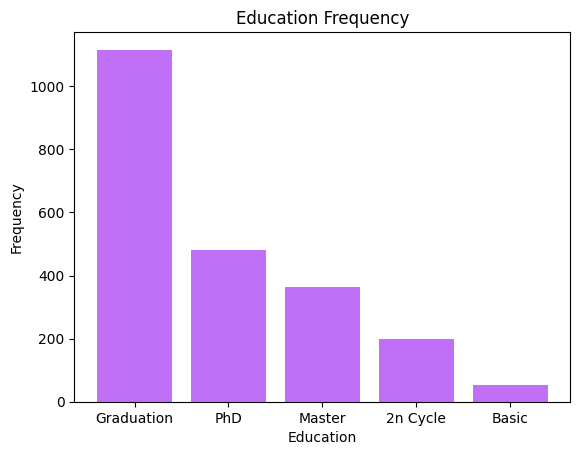

In [ ]:
tabla_frecuencia= data1["Education"].value_counts( )
plt.bar(x=tabla_frecuencia.index,height =tabla_frecuencia, color= "#C070F6" )
plt.xlabel("Education") # Etiqueta del eje x
plt.ylabel("Frequency") # Etiqueta del eje y
plt.title("Education Frequency") # Etiqueta del titulo
plt.show()

En vista de que 'Education' es una variabale cualitativa se decidio hacer un diagrama de frecuencia para analizar los datos que nos proporciona esta variable. Aquí, es posible ver que la mayoría de los clientes tienen tienen un nivel de educación respetable ya que son graduados (una frecuencia mayor a 1000 clientes). Por otro lado, podemos ver que el nivel de educación más bajo de los clientes es el básico, teniendo este una frecuencia que va entre (0,200) clientes.

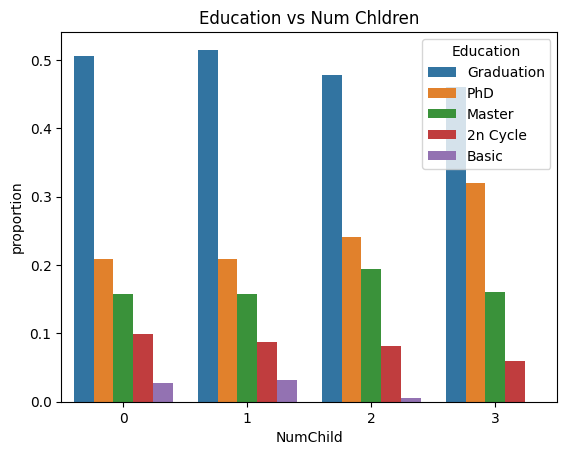

In [ ]:
tabla_frecuencia_relacion= data1.groupby('NumChild')['Education'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='NumChild', y='proportion', hue='Education')
plt.xlabel("NumChild") # Etiqueta del eje x
plt.ylabel("proportion") # Etiqueta del eje y
plt.title("Education vs Num Chldren") # Etiqueta del titulo
plt.show()

Con base a la gráfica, podemos analizar que las personas que se graduaron tienen 1 hijo por lo regular, ya que también este tipo de personas con este nivel de educación también muestran predominancia en no tener hijos. Por otro lado, podemos ver que las personas con un nivel de educación básico rara vez tienen 3 hijos pues la proporción de esta categoría es muy baja e incluso nula ya que no se puede ver. Asimismo, este tipo de personas al igual que las que se graduaron suelen tener ya sea 1 hijo o ninguno. Por otro lado, podemos apreciar que los clientes con un PhD tienen en su mayoria 3 hijos, y aquellos que tienen master tienen 2.

##**3.Transformamos los Datos**

In [ ]:
#Cambiamos la variable categórica "Education" a una dummy
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Education'] = le.fit_transform(data1['Education'])

#Vemos como quedaron lo datos
data1['Education'].value_counts()

,count
Education,
2,1116
4,480
3,365
0,198
1,54


Basandonos en los datos de arriba con la gráfica que hicimos en el punto 2, este sería el significado de cada número según el nivel de educación:

**Graduation**: 2

**PhD**: 4

**Master Education:** 3

**2n Cycle:** 0

**Basic:** 1


##**4. Estandarizamos las Variables e Implementamos los Clúster**

In [ ]:
variables_cc=['Education', 'Income', 'NumWebVisitsMonth', 'Age', 'NumChild','TotalGasto', 'Numcmp']
print("Cantidad de variables", len(variables_cc))

Cantidad de variables 7


In [ ]:
scaler = StandardScaler()
scaled_features= scaler.fit_transform(data1[variables_cc])
scaled_features

array([[-0.35245378,  0.23443526,  0.69219825, ..., -1.26491397,
         1.67672297,  0.61757564],
       [-0.35245378, -0.23408421, -0.13269929, ...,  1.40485676,
        -0.9629273 , -0.50266607],
       [-0.35245378,  0.76973285, -0.54514805, ..., -1.26491397,
         0.28053059, -0.50266607],
       ...,
       [-0.35245378,  0.18847315,  0.27974948, ..., -1.26491397,
         1.05250378,  0.61757564],
       [ 0.53895218,  0.67566348, -0.95759682, ...,  0.0699714 ,
         0.39176114, -0.50266607],
       [ 1.43035815,  0.02512297,  0.69219825, ...,  1.40485676,
        -0.72220448,  0.61757564]])

##**5. Implementación del Modelo: K Means**

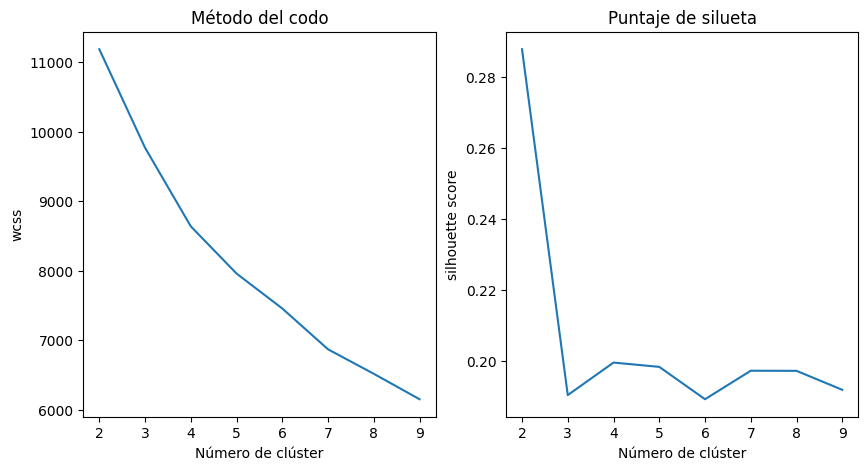

In [ ]:
silueta_score=[]
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Con el algoritmo de segmentación de K-means no es claro el número de clústeres, ya que no se obtiene un puntaje de silueta máximo claro, y por el método del codo no es posible observar un posible punto de inflexión que me establezca un número de clúster visible.
Ahora, ya intentando ver los posible clúster en cada gráfico se podría decir que por el método del codo encontramos una leve inflexión en el número 4, indicando así que este sería el número de cluster apropiado. Por otro lado, con el puntaje de silueta, los máximos que se logran ligeramente ver son los puntos 2, 4 y 7.
Con base a este resultado y a pesar de que fue díficl determinar el número de cluster en los dos casos. Ambos métodos coinciden que el número de cluster debería de ser 4. Sin embargo, primero se va a analizar como sería la repartición de los datos con cada uno de los posibles clúster (2,4 y 7), los cuales fueron arrojados por estos métodos.

In [ ]:
#Si escogieramos 2
k_means=KMeans(2, random_state=123  )
k_means.fit(scaled_features )
data1["labels_k_means"]= k_means.labels_
data1["labels_k_means"] = data1["labels_k_means"].astype(str)
data1["labels_k_means"].value_counts()

,count
labels_k_means,
0,1453
1,760


In [ ]:
#Si escogieramos 7
k_means=KMeans(7, random_state=123  )
k_means.fit(scaled_features )
data1["labels_k_means"]= k_means.labels_
data1["labels_k_means"] = data1["labels_k_means"].astype(str)
data1["labels_k_means"].value_counts()

,count
labels_k_means,
4,509
2,475
3,402
1,376
0,285
6,165
5,1


In [ ]:
#Si escogieramos 4
k_means=KMeans(4, random_state=123  )
k_means.fit(scaled_features )
data1["labels_k_means"]= k_means.labels_
data1["labels_k_means"] = data1["labels_k_means"].astype(str)
data1["labels_k_means"].value_counts()

,count
labels_k_means,
0,791
2,631
3,603
1,188


Después de ver como serían los cluster con base a los resultados del método del codo y el puntaje de silueta, se considera que el número de clúster apropiado sería 4 clúster (el número que arrojó ambos métodos). Ya que si escogemos dos clúster, la separación de datos puede no ser tan buena; y cuando escogemos 7, al tener tantos clúster causa que en uno de estos solo tenga 1 datos, lo cual no nos proporcionará información objetiva. En fin, el número de clúster que nos puede dar la mejor información sería **4**.

*Interpretamos los Resultados*

In [ ]:
print(data1["labels_k_means"].value_counts(normalize=True))
px.bar(data1["labels_k_means"].value_counts(normalize=True),
       color_discrete_sequence=["#C070F6"],
       title="Frecuencia Clústers")

labels_k_means
0    0.357433
2    0.285133
3    0.272481
1    0.084953
Name: proportion, dtype: float64


Según la gráfica se observa que el cluster 0 es el que tiene los clientes más frecuentes representando el 35.74% de los clientes. A este le sigue el clúster 2 y el clúster 3, representando el 28.51% y el 27.24% respectivamente. Por último el clúster menos frecuente es el 1 con el 8.49

In [ ]:
px.box(data1, x='labels_k_means', y='Education',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Education: Boxplot por clúster')

Con base a la gráfica logramos ver que tanto el clúster 0 como el clúster 1 son aquellos que presentan mayor variabilidad frente a la variable Educación. Además, podemos decir que el 75% de los datos de estos clústers se encuentran entre 2 (Graduation) siendo el cuartil 1, y 4 (PhD) el cuartil 3. Dando como resultado que los clientes de estos clústers, tienen niveles de educación relativamente altos ya que varian entre Graduation (2), Master Education (3) y PhD (4).

Sin embargo, en promedio el clúster 0 es el que tiene un límite mayor al de los demás clúster con 3 (Master Education). Mientras que el del clúster 1, es de 2 (Graduation).

En cuanto a los clúster 3 y 2, ambos tienen un promedio de 2 (Graduation). No obstante, el cluster 3 cuenta con un 25% de los datos entre el 0 (2n Cycle) hasta el cuartil 1, el cual es el mismo del promedio (2). Entre tanto, el segundo clúster, cuenta el 75% de sus datos hasta el 2 (Graduation).  

Por último, el clúster 0 es el que tiene en promedio un nivel de educación más alto del resto de clúster, pues este tiene un promedio de 3 que equivale a Master Education, mientras que el resto d clústers tienen un nivel de educación promedio de 2 que equivale Graduation.

In [ ]:
px.box(data1, x='labels_k_means', y='Income',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Income: Boxplot por clúster')

El 25% de los clientes del clúster 1 cuentan con ingresos entre 86.233k (Q3) en adelante (máx= 666.666k). Igualmente, este es el clúster que tiene un promedio mayor al de los otros clúster, ya que es de 80.135k. Y el 100% de los ingresos de este clúster se encuentran por encima de 37.929k que es mayor al ingreso promedio de los clientes de los clúster 0 y el 2.
El clúster que le sigue con mayor cantidad de ingresos promedio, es el clúster 3 con 70.932k. A este le sigue el clúster 0 con 46,61k, y por último el clúster 2 con 30.675k.

In [ ]:
px.box(data1, x='labels_k_means', y='NumWebVisitsMonth',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='NumWebVisitsMonth: Boxplot por clúster')

El clúster que cuenta con mayor variabilidad es el clúster 1. El cual tiene un número de visitas promedio al mes de 3 y un máximo de 9. Siendo este clúster junto con el 3, los que tienen menor promedio de visitas a la página web de la compañia en un mes.

Por otro lado, el clúster 2 es el que cuenta con un mayor número de 7 visitas promedio a la página web al mes, donde 50% de los datos fluctuan entre 6-8 visitas. Finalmente, el clúster 0, cuenta con 6 visitas de la web en promedio al mes.

In [ ]:
px.box(data1, x='labels_k_means', y='Age',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Age: Boxplot por clúster')

El clúster 1 es el que tiene mayor variabilidad seguido del clúster 3. Pero, el clúster que cuenta con la edad pormedio más alta es el clúster 0, con 59 años.
Ahora, fijandonos en el resto de las edades promedio de los clúster nos podemos dar cuenta que para esta compañia la edad promedio de sus clientes varia entre 59 y 46 años, siendo esta última la más bajita de todos y la que pertenece al segundo clúster.

En el caso del clúster 1, la mitad de los datos cuentan con una variabilidad que va desde los 42 años hasta los 66 años. Estos valores son muy similares a los del clúster 3, ya que su variabilidad es entre 49-67 años.

In [ ]:
px.box(data1, x='labels_k_means', y='NumChild',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='NumChild: Boxplot por clúster')

Con base a la grafica nos podemos dar cuenta que el número de hijos promedio tanto del clúster 3 como del 1 es de 0 hijos. Por otro lado, viendo el clúster 0 y el 2, podemos decir que si bien el 0 tiene mayor variabilidad que el 2 (el Q1, Q3 y la mediana tienen el mismo valor), ambos tienen clientes que en promedio tienen un solo hijo.  

In [ ]:
px.box(data1, x='labels_k_means', y='TotalGasto',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TotalGasto: Boxplot por clúster')

La gráfica nos da a entender que en el clúster 2 están los clientes que menos gastan pues tan solo tienen un total de gasto promeio de 68 unidades. El caso contrario sería el del clúster 1, pues es el que mayor gasto promedio (1,549 unidades). En el caso del clúster 3, el total de gasto de los clientes tiene un rango de (6,2440) unidades. Mientras que el del clúster 0 es (8,1722) unidades.

In [ ]:
px.box(data1, x='labels_k_means', y='Numcmp',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Numcmp: Boxplot por clúster')

Mirando el gráfico, vemos que los clientes en el clúster 0 y 2, prefirieron la campaña 0 por encima del resto. El 3 también podría entrar en esta categoría, no obstante tiene mayor variabilidad, y se encuentra que ciertos clientes como máximo aceptaron la campaña 1. Caso contrario es lo que pasa con el clúster 1, pues aquí vemos que en promedio los clientes eligieron la campaña tres, no obstante, hay clientes que escogieron las campañas entre la 0 y la 5 pues este es el rango aplicable al clúster.

##**6. Análisis General por Clúster - Modelo K-Means**

#**Clúster 0**

**Nivel Educativo:** Muy Alto, con un promedio de Master.

**Ingresos**: Alto, con un promedio superior a los 46.61k y un rango intercuartílico que indica una concentración en la parte media-alta de la distribución (37.09675k,55.83175k).

**Edad**: Adulta, con un promedio de 59 años.

**Comportamiento Digital:** Activo en línea, con un promedio de 6 visitas mensuales al sitio web.

**Estructura Familiar:** Tendencia a tener un solo hijo.

**Total Gasto (Unidades):** Moderado, con un gasto promedio de 215 unidades y un rango bastante amplio (8,1722).

**Receptividad a Campañas:** Baja, pocos clientes aceptando más de 2 campañas.

Los clientes de este clúster son los más frecuentes (35.74%) y cuentan con un nivel de educación promedio de 3 (Master Education), siendo este uno de los niveles de educación más altos junto con el PhD, y en comparación con los otros clústers es el que cuenta con un nivel más alto de educación. Además, este clúster tiene un ingreso promedio de 46.61k, donde el 50% de los ingresos varía entre 37.09675k (Q1) y 55.83175k (Q3). También, tiene un promedio de 6 visitas al mes por medio de la página web de la compañia, y una edad de 59 años. Aparte, estos clientes suelen por lo general tener un solo hijo y un gasto promedio de 215 unidades en un rango de (8,1722) el cual es relativamente bajo en comparación a los demás clústers. Adicionalmente, estos clientes no suelen aceptar campañas pues tan solo aceptaron por lo menos 3 camapañas (0,1,2) siendo la 0 la más aceptada.



#**Clúster 1**
**Nivel Educativo:** Alto, con un promedio de Graduación, pero con un 75% de los clientes con un nivel entre Graduación, Master y PhD.

**Ingresos**: Los ingresos promedio son significativamente más altos que en otros clústers (80.135k), lo que indica un alto poder adquisitivo.

**Edad**: Rango muy amplio de edad de (29-81) años, con una edad promedio de 53 años.

**Comportamiento Digital:** Bajo, menor promedio de los 4 clústers junto con el 3 (3 visitas mensuales).

**Estructura Familiar:** Tendencia a no tener hijos.

**Total Gasto (Unidades):** Alto, con 1,549 unidades en promedio. Siendo el clúster que más gasta.

**Receptividad a Campañas:** Alta, son los clientes que muestran disposición en aceptar campañas.

Los clientes dentro de este clúster son los menos frecuentes representando el 8.49%, contando con un nivel de educación promedio de 2 (Graduation), y el 75% de los clientes cuentan con un nivel de educación entre Graduation (2), Master Education (3) y PhD (4), siendo estos dos últimos los niveles más altos en este caso. De esta misma forma, cuando analizamos los ingresos, nos dimos cuenta que este clúster es el que tiene en promedio ingresos mayores a los demás (80.135k), donde el 75% de los clientes tienen ingresos por encima de 72.0455k. Por otro lado, logramos que a pesar de tener los ingresos promedios más altos, y un nivel de educación alto, cuenta con el menor promedio mensual del número de visitas a la página web, donde los clientes tienen un rango de edad de (29-81) años, y estos suelen no tener hijos, aunque existen algunos clientes dentro de este clúster que tienen 3 hijos. Con base al total de gasto el este clúster es el que más gasta con 1,549 unidades en promedio. Adicionalmente, estos clientes son los que por lo general acepatan las campañas.



#**Clúster 2**
**Nivel Educativo:** Bajo, graduación, con un rango intercuartil entre básico y graduación.

**Ingresos**: Bajos, los más bajos de todos los clústers (30.675k).

**Edad**: Jovén, en comparación al resto de cluster (46 años en promedio)

**Comportamiento Digital:** Alto nivel de interacción con la página web con 7 visitas promedio (clúster con mayor # de visistas mensuales a la web).

**Estructura Familiar:** Tendencia a tener un solo hijos.

**Total Gasto (Unidades):** Bajo, con 68 unidades en promedio. Siendo el clúster que menos gasta.

**Receptividad a Campañas:** Relativamente Baja, aceptaron con frecuencia la campaña 0, pero acepataron hasta la campaña 3.

Los clientes de este clúster son los segundos más frecuentes y representan un 28.51% de los clientes, pero, tienen un nivel de educación relativamente bajo (Graduation), lo que por lo general lleva a tener menores ingresos (clúster que cuenta con la menor cantidad de ingresos promedio, con tan solo 30.675k), y el querer tener tan solo un hijo, son aquellos que tienen una menor cantidad de gastos promedio (68 unidades). Además, tienen la menor edad promedio de todos los clústers (46 años). No obstante, es el clúster que cuenta con el mayor número de visitas promedio a la página web de la compañia (7). Y son los clientes que aceptaron la campaña 3 (punto máximo), pero tuvieron mayor frecuencia en aceptar la campaña 0. En fin, es el clúster que a pesar de tener mayor interacción en redes, es el que menos gasta de todos, probablemnte gracias a sus ingresos


#**Cluster 3**
**Nivel Educativo:** Relativamente Alto, con un rango intercuartil entre Graduation y Master.

**Ingresos**:  Alto, con un promedio de 70.932k (segundo más alto de los clústers) y un rango considerable (64.851k, 78.38375k).

**Edad**: Adulta, con un promedio de 58 años, y un rango de (49,67) años.

**Comportamiento Digital:** Normal, visitan el sitio web 3 veces al mes en promedio.

**Estructura Familiar:** Tendencia a no tener hijos, pero hay quienes tienen hasta máximo 2 hijos dentro del clúster.

**Total Gasto (Unidades):** Medio Alto, con un promedio de 1127 unidades y un rango amplio (6,2440).

**Receptividad a Campañas:** Mayormente receptivos a la campaña 0, pero también aceptan la campaña 1.

Cuenta con clientes con un nivel de educación más bien bajo (2 o Graduation). También, tiene el segundo ingreso promedio más alto de los clústers (70.932k) el cual va desde 64.851k y 78.38375k. Asimismo, se logró apreciar que los clientes pertenecientes a este clúster cuentan con un promedio de 3 visitas a la página web de la compañia al mes, lo cual podría deberse a que la edad promedio de los clientes es de 58 y su variabilidad es 49-67 años. De la misma manera, estos clientes en promedio no tienen hijos, pero existen aquellos dentro de este cluster que tengan hasta máximo 2 hijos. Por otro lado, el rango de unidades de gasto es de (6,2440), donde el promedio serian 1127 unidades. Y los clientes acepatarón hasta la campaña 1, siendo la 0 la más aceptada. Por último, no va de más mencionar que son los clientes que tienen una frecuencia de 27.24%.

##**7. Implementación del Modelo - Clúster Jerárquico**

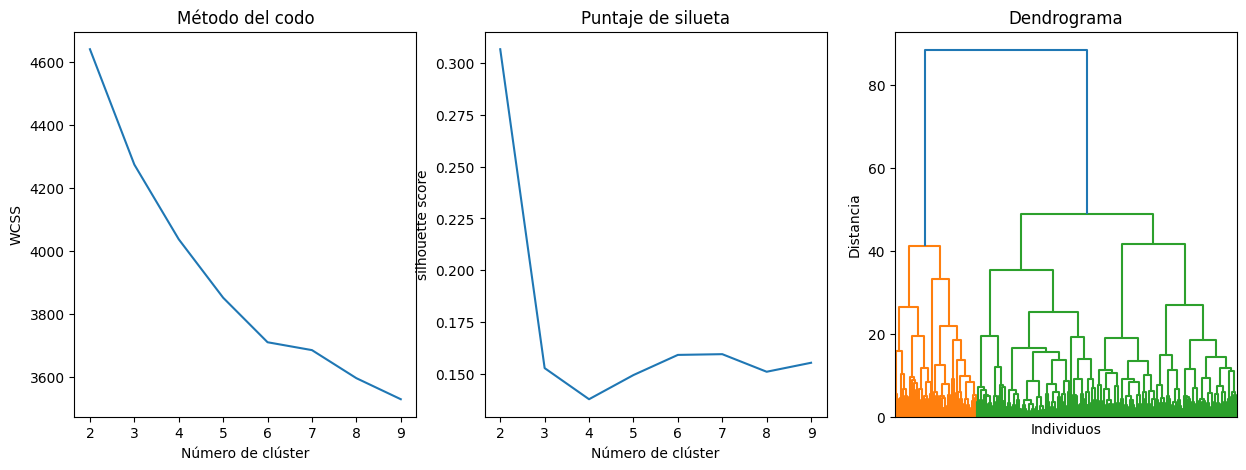

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[0].set_title("Método del codo")
axes[0].set_xlabel("Número de clúster" )
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")
axes[1].set_title("Puntaje de silueta")
axes[1].set_xlabel("Número de clúster" )

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

Analizando las gráficas, podemos concluir que por el método del codo, el punto de inflexión se da en 6, mostrando así que este debería de ser el número de clústers. Con base al puntaje de silueta el número de clústers sería ya sea el 6 o el 7, pues son los puntos máximos. Por último el dendograma nos muestra que el número apropiado de clústers estaría entre 3 y 6 clústers. Ahora, si nos vamos a aquellos números que más se repiten el número apropiado de clústers serían **6.**

In [ ]:
#Si escojo 6
hc=AgglomerativeClustering(6 )
hc.fit(scaled_features )
data1["labels_hc"]= hc.labels_
data1["labels_hc"] = data1["labels_hc"].astype(str)
data1["labels_hc"].value_counts()

,count
labels_hc,
2,585
1,526
3,382
0,293
4,239
5,188


Después de probar las opciones posibles, la primera que descartamos es la de 7 clústers pues un clúster donde solo exista un dato no me va a generar información concluyente. Y finalamente llegamos a la conclusión será mejor utilizar __ clústers.

*Interpretamos los Resultados*

In [ ]:
print(data1["labels_hc"].value_counts(normalize=True))
px.bar(data1["labels_hc"].value_counts(normalize=True),
       title="Frecuencia Clústers")

labels_hc
2    0.264347
1    0.237686
3    0.172616
0    0.132399
4    0.107998
5    0.084953
Name: proportion, dtype: float64


Con base a esta gráfica podemos decir que los clientes más frecuentes son aquellos del clúster 2 (26.43%), seguidos del clúster 1 (23.76%), clúster 3 (17.26%), clúster 0 (13.23%), clúster 4 (10.79%), y finalmente el clúster 5 (8.49%)

In [ ]:
px.box(data1, x='labels_hc', y='Education',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Education: Boxplot por clúster')

El gráfico nos da a entender que el clúster 3, es el que tiene el promedio más alto de educación en comparación de los demás clústers (3 = Master Education). Seguido de este estarían el resto de clústers con un promedio de 2 (Graduation). La diferencia del resto de clúster varía en el rango. Por ejemplo, el clúster 4 tiene mayor variabilidad, y cuenta con un rango (0,4) es decir los clientes dentro de este clúster pueden tener cualquiera de los 5 niveles de educación posibles en este caso. Por otro lado, los clúster 1 y 2, cuentan con el mismo rango (1,4) excluyendo la categoría 2nCycle. Además podemos ver que el clúster 5 concentra el 75% de sus clientes en 0 (2nCycle). Finalmenete el clúster 0 tiene el 75% de sus clientes con una educación por encima de 2 (Graducation, Master Education y Phd).

In [ ]:
px.box(data1, x='labels_hc', y='Income',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Income: Boxplot por clúster')

Esta gráfica nos da a entender que el clúster con promedios más alto es el 4 (77.766k), seguido muy cerca del clúster 0 (76.081k). Por el contrario el clúster 5 es el que tiene el promedio de ingresos más bajos (32.28k). Mirando ahora el clúster 1 podemos ver que si bien el 100% están por encima de 24.221k (promedio de 60.4865k), hay datos atípicos que tienen como limite 13.084k. El clúster 3, cuenta con un promedio de ingresos de 43.472k donde el la mayoria de sus ingresos van por encima de 13.26k. Por último, el clúster 2 tienen unos ingresos promedio de 34.421k concentrando el 50% de sus datos entre (26.93475k,42.4095k).

In [ ]:
px.box(data1, x='labels_hc', y='NumWebVisitsMonth',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='NumWebVisitsMonth: Boxplot por clúster')

Los clústers que cuentan con mayor número de visitas promedio en la web de sus clientes son el 3, 2, y el 5 (7 visitas). Sin embargo el 5 es el que cuenta con una mayor variabilidad. Mirando el clúster 4, nos damos cuenta que es el que mayor variabilidad tiene con un rango de (1,9), y un promedio de 4 visitas. El  50% de los clientes del clúster 1 visitan la web mensualmente entre (4,6) veces, con un promedio de 5 visitas. Al final vemos el clúster 0, que es el que menos visitas mensuales realiza a la web, con 2 visitas en promedio.

In [ ]:
px.box(data1, x='labels_hc', y='Age',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Age: Boxplot por clúster')

El clúster con mayor variabilidad es el 4, el cual cuenta con una edad promedio de 55 años y un rango de (29,83). Sin embargo, este no es el que cuenta con el promedio de edad más elevado, ya que la del clúster 1 es de 62 años. A este clúster le sigue el el 3 y el 0, con 59 y 58 años respectivamente. Ahora, en el caso del clúster 2 y el 5 son aquellos tienen la edad promedio más baja en comparación al resto, ya que esta es de 48 y 47 años.

In [ ]:
px.box(data1, x='labels_hc', y='NumChild',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='NumChild: Boxplot por clúster')

En esta gráfica podemos notar que sin duda alguna el clúster con mayor variabilidad es el 4 (0,1), el cual indica que los clientes tienen una preferencia en no tener hijos, pero algunos de estos tienen tan solo un hijo. Con el resto de clústers nos damos cuenta que los clientes pertenecientes a estos mostraron preferencia por tener ningún hijo, o tener 1 o 2 (Cluster 3= 2, Clúster 1, 2 y 5= 1, y Clúster 0= 0).

In [ ]:
px.box(data1, x='labels_hc', y='TotalGasto',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TotalGasto: Boxplot por clúster')

En temas de gasto, el clúster con mayor gasto promedio es el 4 (1544 unidades), seguido del 0 (1250 unidades) y del 1 (727.5 unidades), los cuales vendrían siendo los clúster que más gastan. Por otro lado, tenemos a los clústers 3, 2 y 5, que son aquellos que gastan menos, con un promedio de 88, 84 y 77 unidades en promedio.

In [ ]:
px.box(data1, x='labels_hc', y='Numcmp',color="labels_hc",
      #  points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Numcmp: Boxplot por clúster')

Con respecto al número de campañas, podemos notar que sin duda alguna el clúster con mayor variabilidad es el 4, el cual mostró una preferencia en aceptar la campaña 2, pero hubo clientes dentro de este que aceptaron entre la 1 y la 5. Después, vemos que el clúster2 y el 0, mostraron preferencia en aceptar la campaña 0, pero estos tienen un rango de (0,2). Por último, en los clústers 3, 1 y 5, la gran mayoría de clientes tan solo mostraron interés en la campaña 0.

##**8. Análisis General por Clúster - Clúster Jerárquico**

#**Cluster 0**
**Nivel Educativo:** Alto, (Graduation, Master, PhD).

**Ingresos**: Altos (76.981k, segundo lugar entre todos los clústers).

**Edad**: Adulto, 58 años en promedio

**Comportamiento Digital:** Bajas, 2 visitas mensuales promedio.

**Estructura Familiar:** Tendencia a no tener hijos.

**Total Gasto (Unidades):** Alto, 1250 unidades promedio (segundo más alto).

**Receptividad a Campañas:** Mayormente receptivos a la campaña 0, pero también aceptan la campañas 1 y 2.

Los clientes de este clúster cuentan con una frecuencia relativamente baja de 13.23%. Pero, tienen un nivel de educación alto, pues este va desde (2,4) el cual incluye Graduation, Master Education y PhD. Asimismo, cuenta con ingresos relativamente altos, pues estos son de 76.981k (segundo más alto de todos los clústers). No obstante, por lo general visita mensualmente tan solo 2 veces la web de la compañia, y esto se puede deber a que el promedio de edad es de 58 años. Estos clientes mostraron una preferencia en no tener hijos. Por otro lado, es el segundo que más unidades gasta, con un promedio. de 1250 unidades. Finalmente este clúster mostró preferencia en aceptar la campaña 0, sin embargo cuenta con un rango de (0,2).

#**Cluster 1**
**Nivel Educativo:** Medio-Alto, con un promedio de graduación pero con un rango que abarca Master Education y PhD.

**Ingresos**: Relativamente Altos, 60.4865k (tercer lugar entre todos los clústers).

**Edad**: Adulto, 62 años en promedio (clúster con mayor edad promedio).

**Comportamiento Digital:** Frecuentes, con un promedio de 5 visitas mensuales.

**Estructura Familiar:** Tendencia a solo tener un hijo.

**Total Gasto (Unidades):** Alto, 727.5 unidades promedio (de los más altos).

**Receptividad a Campañas:** Exclusivo, pues tan solo mostraron preferencia en la campaña 0.

Los usuarios de este clúster tiene una frecuencia del 23.76%, la cual es relativamente alta. A pesar de esto, este clúster cuenta con un nivel de educación normal, pue si bien su promedio es 2 (Graduación) su rango abarca categorías como Master Education y PhD. Asimismo, es el tercer clúster con mayor número de ingresos promedio (60.4865k), pero tiene ciertos datos atípicos que tienen como limite inferior 13.084k. Por otro lado, el  50% de los clientes visitan la web mensualmente entre (4,6) veces, con un promedio de 5 visitas. Ahora, la edad promedio de los clientes que componen este clúster es de 62 años (la más alta de todos los demás clústers), y los clientes mostraron una preferencia en tener tan solo un hijo. Aparte, es uno de los clúster que más gasta, con un promedio de 727.5 unidades. Para terminar, los clientes de este clúster, solo mostraron interés en la campaña 0.

#**Cluster 2**
**Nivel Educativo:** Normal, con un promedio de 2 (Graduación), pero un rango de (1,4) donde los hay clientes con nivel educativo de master o PhD.

**Ingresos**: Ingresos relativamente bajos, con un promedio de 34.421k.

**Edad**: Media, Tiene una edad promedio de 48 años (segunda más baja).

**Comportamiento Digital:** Alta interacción en la web, con un promedio de 7 visitas mensuales.

**Estructura Familiar:** Preferencia de tener un solo hijo.

**Total Gasto (Unidades):** Bajo, 84 unidades (el más bajo de todos).

**Receptividad a Campañas:** Tienen preferencia por la campaña 0, sin embargo algunos de estos también aceptaron la 1 y/o la 2.

Los clientes de este clúster son aquellos que mayor frecuencia tienen en comparación al resto de clústers (26.43%). Ahora, en términos de educación, se podría decir que esta es normal, su promedio es de 2 (Graduación), pero tiene un rango de (1,4) en el cual abarca niveles como Master Education y PhD. Por otro lado, vemos que tiene unos ingresos promedio de 34.421k, los cuales concentran el 50% de sus datos entre (26.93475k,42.4095k). Además, cuentan un promedio de 7 visistas mensuales a la página web, esto se puede deber a que la edad promedio de los clientes es de 48 años. Aparte, estos clientes mostraron una preferencia en tener tan solo un hijo. Aparte, son los clientes que gastan menos, pues tienen tan solo un promedio de 84 unidades. Finalmente, en temas de preferencia de campañas, los clientes de este clúster si bien tuvieron preferencia por la campaña 0, tienen un rango de (0,2).

#**Cluster 3**
**Nivel Educativo:** Muy alto, educación promedio de Master.

**Ingresos**: Medios, con un promedio de 43.472k.

**Edad**: Adulto, 59 años en promedio.

**Comportamiento Digital:** Alto, 7 visitas mensuales a la web.

**Estructura Familiar:** Preferencia por tener 2 hijos.

**Total Gasto (Unidades):** Relativamente bajo, con tan solo 88 unidades en promedio.

**Receptividad a Campañas:** Interés solamente en la campaña 0.

La frecuencia de los clientes de este clúster representa el 17.26% de los datos. No obstante, es el clúster que mejor educación promedio tiene (3 = Master Education). No obstante, cuenta con un promedio de ingresos de 43.472k donde el la mayoria de sus ingresos van por encima de 13.26k. Asimismo, tienen un promedio de 7 visitas mensuales a la web, y una edad de 59 años. Además, solo suelen tener tan solo 2 hijos. Por otro lado, tiene un gasto total de tan solo 88 unidades promedio. Después de todo, en la categoría aceptación de campañas, los clientes mostraron interés solamente en la campaña 0.

#**Cluster 4**
**Nivel Educativo:** Normal, con un promedio de 2, pero un rango de (0,4).

**Ingresos**: Muy Altos, con un promedio de 77.766k (los más altos en comparación al resto de clústers).

**Edad**: Normal, con un promedio 55 años y un rango de edad entre los 29 y 83 años.

**Comportamiento Digital:** Bajo, tan solo realizan en promedio 4 visitas, y el máximo de vsitas mensuales es 9.

**Estructura Familiar:** Mayor variabilidad con un rango entre (0,1) hijos.

**Total Gasto (Unidades):** Muy alto, de 1544 unidades (mayor en comparación al resto de clústers).

**Receptividad a Campañas:** Muy alto, preferencia por la campaña 2 pero hay quienes aceptaron campañas entre la 1 y la 5 (mayor preferencia en las campañas).

Siendo la segunda frecuencia más baja, los clientes representan tan solo 10.79% de los datos. En temas de educación es el clúster con mayor variabilidad teniendo un rango de (0,4) y un promedio de 2 (Graduación), y es por esta razón que quizas sea también el que tiene los ingresos promedio más altos (77.766k). De la misma forma, estos clientes realizan en promedio 4 visitas mensuales en la web con un máximo número de visitas de 9. Esto podría deberse a que el promedio de edad es de 55 años con un rango de (29,83). Por otro lado, este fue el clúster con mayor variabilidad en temás de hijos (0,1), lo que significa que los clientes tienen preferencia no tener hijos, pero algunos de estos tan solo tienen uno. No obstante, es el clúster con un total de gasto mayor, pues gasta 1544 unidades en promedio. Finalmente, este es el clúster que mostró mayor aceptación a la campañas, pues si bien tuvieron preferencia por la campaña 2, hay clientes que aceptaron las campañas entre la 1 y la 5.

#**Cluster 5**
**Nivel Educativo:** Bajo, pues el 75% de los clientes tienen un nivel de educación 0 (2nCycle).

**Ingresos**: Muy bajos, con ingresos promedios de 32.28k, siendo el número de ingresos promedio más bajos de todos.

**Edad**: Jóven, con una edad promedio de 47 años (la más baja de todas).

**Comportamiento Digital:** Alto, pues de los clústers con mayor número de interacción mensual en la web (7 visitas).

**Estructura Familiar:** Mostraron preferencia por solo tener un hijo.

**Total Gasto (Unidades):** Muy bajo, siendo el clúster que menos gasta con 77 unidades.

**Receptividad a Campañas:** Baja, no muestran gran interés por otras campañas, solo la 0.

Los clientes representados en este clúster tan solo expresan el 8.49% de los datos, donde el 75% de ellos tienen un nivel de educación 0 (2nCycle). Siguiendo la misma tendencia, son los clientes que tienen los ingresos promedio más bajos de todos (32.28k), no obstante es el que tiene mayor variabilidad (22.68k,50.4285k). Por el contrario, es uno de los clústers que mayor número de visitas tiene en la web con un promedio de 7 mensuales, lo que puede darse gracias a que la edad promedio es la menor de todas con tan solo 47 años, al igual que tan solo mostraron preferencia en tener un solo hijo. Adicionalmente, son el clúster que menos gasta (77 unidades). Ahora, analizando la aceptación de campañas los clientes solo mostraron interés en aceptar la campaña 0.

##9. Conclusión General de Ambos Modelos

Para definir el mejor algoritmo de clustering en este caso, se tomaron en cuenta dos aspectos.

1. Comparación de las métricas aplicadas en cada uno (método del codo y  puntaje de silueta).  
2. Interpretabilidad de los datos, en el sentido de cuál me generó mejores conclusiones.

Primero, miramos entonces las métricas.

*Método del Codo:* Cuando miramos el método del codo nos podemos dar cuenta que si bien para el modelo K-Means dio un "codo" muy sutil, al final nos arrojó un resultado de 4 clústers. Asimismo, cuando realizamos este método para el Clustering Jerárquico, el resultado arrojado mostró 2 posibles "codos", siendo el 6 el escogido. Así que, mirando este método, para ambos algoritmos hubo ciertos temas que no permitieron elegir con certeza el número de clusters, sin embargo, a pesar de que en el modelo K-Means fue leve el "codo", dió como resultado tan solo un número de clústers siendo este más claro que el del otro algoritmo.

*Puntaje de Silueta:* Para el K-Means, el resultado arrojó 3 posibles clústers. Asimismo, para el Clustering Jerárquico esta métrica arrojó 2 posibles clústers. En conclusión, en el caso de ambos algoritmos este puntaje no fue concluyente para ninguno de los dos algoritmos en cuestión.

Ahora, miraremos la interpretabilidad de los datos, para saber que algoritmo separó mejor los clústers.

*K-Means:* Los resultados arrojados de cada uno de los 4 clústers, me segmentaron los datos de una buena forma, pues a la hora de interpretar las variables, se logró sacar pérfiles distintos (similitudes existentes pero pocas) de los clientes pertenecientes a cada clúster. Lo que ayudará al negocio, ya que le ayudará a generar diferentes estrategias para cada uno de estos segmentos.

*Clustering Jerárquico:* Teniendo en cuenta los resultados brindados por este algoritmo podemos decir que los 6 clúster generados muestran más número de similitudes entre ellos, lo cual perjudicará el análisis personalizado de estrategias.

En fin, según lo analizado anteriormente, el clúster que mejor separo los datos para este caso sería el modelo **K-Means**.


Ahora, se va a crear una propuesta para el **clúster 1** basado en lo generado por el modelo K-Means.

La compañia para este clúster que cuenta con clientes con un alto nivel de educación, ingresos y gasto total; debería de hacer un análisis con base a los productos que más gasta, para así generar las campañas adecuadas a este segnmento, ya que por lo general suelen tener una disposición en aceptar las campañas. Por ejemplo, si se encuentra que este segmento de clientes el cuál tiene una edad promedio de 53, suele invertir su dinero en productos como la carne, la empresa deberá generar campañas en donde este producto se vea involucrado. Teniendo en cuenta los ingresos y esta preferencia hipotética, podría la empresa crear una campaña tipo "Sabor argentino, brasilero, entre otras culturas" ya que estas personas por lo general al tener un alto nivel adquisitivo y una preferencia por este producto, podrán sentir interés por probar este tipo de preparaciones.

Aparte, la empresa podría implementar con base a la tendencia de compras y las visitas previas de la página web, un contenido personalizado  para así aumentar el nivel de interacciones por este medio.